<a href="https://colab.research.google.com/github/chellabeatrixkiddo/ML_and_DL/blob/master/emergency_vehicle_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Loading and Preprocessing

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Initialie random seed
seed = 42
rng = np.random.RandomState(seed)

In [0]:
data = pd.read_csv('/content/drive/My Drive/DLDatasets/CV101/datasets/emergency_classification/emergency_classification.csv')

In [0]:
# load images and store it in numpy array
X = []
for img_name in data.image_names:
    img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X=np.array(X)

# create target
y = data.emergency_or_not.values

In [0]:
X.shape

(2352, 224, 224, 3)

In [0]:
X = X / X.max()

In [0]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X,y,test_size=0.3, random_state=42)

## 3. Model Building

In [0]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 46s 28ms/step - loss: 0.6966 - acc: 0.5778 - val_loss: 0.6103 - val_acc: 0.6785
Epoch 2/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.5943 - acc: 0.6944 - val_loss: 0.5946 - val_acc: 0.6572
Epoch 3/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.5564 - acc: 0.7284 - val_loss: 0.6015 - val_acc: 0.6969
Epoch 4/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.5184 - acc: 0.7558 - val_loss: 0.6559 - val_acc: 0.6062
Epoch 5/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.4865 - acc: 0.7752 - val_loss: 0.5275 - val_acc: 0.7351
Epoch 6/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.4529 - acc: 0.8007 - val_loss: 0.4958 - val_acc: 0.7450
Epoch 7/10
1646/1646 [==============================] - 37s 23ms/step - loss: 0.4127 - acc: 0.8165 - val_loss: 0.4823 - val_acc: 0.7635
E

In [0]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [0]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6773 - acc: 0.5741 - val_loss: 0.6757 - val_acc: 0.5623
Epoch 2/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.6437 - acc: 0.6434 - val_loss: 0.6177 - val_acc: 0.6841
Epoch 3/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.6086 - acc: 0.6859 - val_loss: 0.6817 - val_acc: 0.5892
Epoch 4/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.5719 - acc: 0.7102 - val_loss: 0.8707 - val_acc: 0.4518
Epoch 5/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.5594 - acc: 0.7181 - val_loss: 0.5450 - val_acc: 0.7153
Epoch 6/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.5344 - acc: 0.7479 - val_loss: 0.5303 - val_acc: 0.7238
Epoch 7/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.5065 - acc: 0.7655 - val_loss: 0.7898 - val_acc: 0.5907
Epoch 8/

In [0]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)



There is 44 % chance that it is an emergency vehicle
Whereas actual class is  0


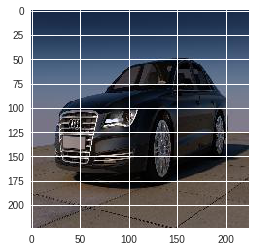

In [0]:
# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print('There is', prob , '% chance that it is an emergency vehicle')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

47 % sure that it is emergency
Whereas actual class is  1


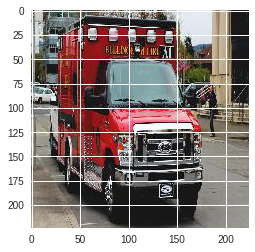

In [0]:
incorrect_indices = np.where(predictions != valid_y)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/emergency_classification/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

plt.imshow(img)

## 4. Hyperparameter Tuning

In [0]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

# increase number of convolutional layers
# increase number of pooling layers
# increase number of convolutional filters
# change size of conv
# change size of pooling
# change padding technique
# change stride

In [0]:
# increase number of convolutional and pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1440100   
__________

In [0]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 15s 9ms/step - loss: 0.6780 - acc: 0.5863 - val_loss: 0.6853 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6744 - acc: 0.5863 - val_loss: 0.6794 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6700 - acc: 0.5863 - val_loss: 0.6752 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6654 - acc: 0.5863 - val_loss: 0.6672 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6572 - acc: 0.5893 - val_loss: 0.6588 - val_acc: 0.5652
Epoch 6/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6458 - acc: 0.6124 - val_loss: 0.6472 - val_acc: 0.5722
Epoch 7/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6252 - acc: 0.6537 - val_loss: 0.6277 - val_acc: 0.6105
Epoch 8/

In [0]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(200, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 123s 75ms/step - loss: 0.6782 - acc: 0.5863 - val_loss: 0.6843 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6755 - acc: 0.5863 - val_loss: 0.6807 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6727 - acc: 0.5863 - val_loss: 0.6782 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6690 - acc: 0.5863 - val_loss: 0.6742 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6639 - acc: 0.5863 - val_loss: 0.6714 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6574 - acc: 0.5887 - val_loss: 0.6568 - val_acc: 0.5637
Epoch 7/10
1646/1646 [==============================] - 107s 65ms/step - loss: 0.6453 - acc: 0.6288 - val_loss: 0.6538 - val_acc: 0

In [0]:
# change filter size for convolutional layer and pooling size for pooling layer

from keras.layers import GlobalMaxPool2D

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='valid'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 200)       270200    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 225)       405225    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 225)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               22600     
__________

In [0]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 105s 64ms/step - loss: 0.6796 - acc: 0.5863 - val_loss: 0.6873 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6788 - acc: 0.5863 - val_loss: 0.6875 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6778 - acc: 0.5863 - val_loss: 0.6850 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6784 - acc: 0.5863 - val_loss: 0.6855 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6777 - acc: 0.5863 - val_loss: 0.6853 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6771 - acc: 0.5863 - val_loss: 0.6871 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 104s 63ms/step - loss: 0.6770 - acc: 0.5863 - val_loss: 0.6868 - val_acc: 0

In [0]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 125)     9500      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 150)     468900    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 200)       270200    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 225)       405225    
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 225)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               22600     
__________

In [0]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 122s 74ms/step - loss: 0.6910 - acc: 0.5869 - val_loss: 0.6851 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 106s 64ms/step - loss: 0.6825 - acc: 0.5772 - val_loss: 0.6837 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 106s 64ms/step - loss: 0.6802 - acc: 0.5863 - val_loss: 0.6725 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 105s 64ms/step - loss: 0.6731 - acc: 0.5784 - val_loss: 0.6669 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 106s 64ms/step - loss: 0.6610 - acc: 0.5990 - val_loss: 0.6622 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 105s 64ms/step - loss: 0.6145 - acc: 0.6567 - val_loss: 0.5597 - val_acc: 0.7167
Epoch 7/10
1646/1646 [==============================] - 106s 64ms/step - loss: 0.5647 - acc: 0.7236 - val_loss: 0.5667 - val_acc: 0

In [0]:
# change stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 150)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 200)         270200    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 2, 2, 225)         405225    
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 225)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               22600     
__________

In [0]:
model.fit(X_train, Y_train, epochs=15,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 19s 12ms/step - loss: 0.5764 - acc: 0.6853 - val_loss: 0.4962 - val_acc: 0.7691
Epoch 2/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.4748 - acc: 0.7825 - val_loss: 0.4754 - val_acc: 0.7847
Epoch 3/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.4176 - acc: 0.8019 - val_loss: 0.4436 - val_acc: 0.7805
Epoch 4/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.3571 - acc: 0.8433 - val_loss: 0.4330 - val_acc: 0.7960
Epoch 5/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.3292 - acc: 0.8542 - val_loss: 0.4656 - val_acc: 0.8059
Epoch 6/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.2755 - acc: 0.8815 - val_loss: 0.4353 - val_acc: 0.8187
Epoch 7/15
1646/1646 [==============================] - 17s 10ms/step - loss: 0.2016 - acc: 0.9301 - val_loss: 0.4858 - val_acc: 0.8201
E

![original](https://github.com/chellabeatrixkiddo/CV101/blob/master/notebooks/images/original_vgg_model.png?raw=1)

In [0]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [0]:
model.fit(X_train, Y_train, epochs=200,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/200
1646/1646 [==============================] - 55s 34ms/step - loss: 0.6875 - acc: 0.5705 - val_loss: 0.6861 - val_acc: 0.5609
Epoch 2/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6843 - acc: 0.5705 - val_loss: 0.6868 - val_acc: 0.5609
Epoch 3/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6836 - acc: 0.5851 - val_loss: 0.6857 - val_acc: 0.5609
Epoch 4/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6852 - acc: 0.5741 - val_loss: 0.6880 - val_acc: 0.5609
Epoch 5/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6891 - acc: 0.5729 - val_loss: 0.6919 - val_acc: 0.5609
Epoch 6/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6856 - acc: 0.5717 - val_loss: 0.6985 - val_acc: 0.5609
Epoch 7/200
1646/1646 [==============================] - 44s 27ms/step - loss: 0.6834 - acc: 0.5838 - val_loss: 0.7171 - val_acc: 0